In [175]:
import numpy as np 
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import numpy.linalg as la
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [176]:
df= pd.read_csv("/content/Iris (1).csv",index_col='Id')

In [177]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [178]:
df.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [179]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [180]:
Species = df["Species"].tolist()
X = df.drop("Species", 1)

In [181]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
X

In [183]:
X_corr=(1/150)*X.T.dot(X)
X_corr

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])

In [184]:
a,b,v = np.linalg.svd(X_corr)
eig_values, eig_vectors = b, a
eig_values, eig_vectors

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]))

In [188]:
np.linalg.eig(X_corr)

(array([2.91081808, 0.92122093, 0.14735328, 0.02060771]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

In [189]:
covariance=np.dot(X.T,X)/(X.shape[0]-1)
print(covariance)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [191]:

eigenvalues,eigenvector=np.linalg.eig(covariance)
print(covariance)
print(eigenvalues,eigenvector)

[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
[2.93035378 0.92740362 0.14834223 0.02074601] [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


In [186]:
eigenvector=eigenvector.T
print("eigenvector after Transpose\n",eigenvector)
indexs=np.argsort(eigenvalues)[::-1]
eigenvector=eigenvector[indexs]
print("eigenvector after indexes \n",eigenvector)
eigenvalues=eigenvalues[indexs]
print("eigenvalues \n",eigenvalues) 

eigenvector after Transpose
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]
eigenvector after indexes 
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]]
eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]


variance of each feature--> [73.25884439 23.18509054  3.70855566  0.51865035]


Text(0.5, 0, 'Dimensions')

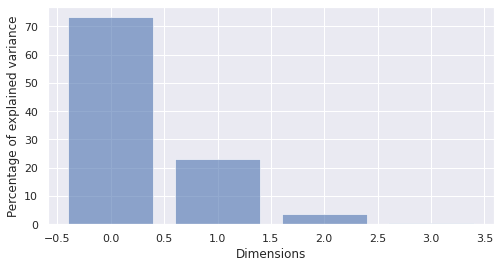

In [192]:
total = sum(eigenvalues)
variance_of_each_feature =(eigenvalues / np.sum(eig_values))*100
print("variance of each feature-->",variance_of_each_feature)
plt.figure(figsize=(8,4))
plt.bar(range(4),variance_of_each_feature, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [193]:
pc1 = X.dot(eig_vectors[:,0])
pc2 = X.dot(eig_vectors[:,1])

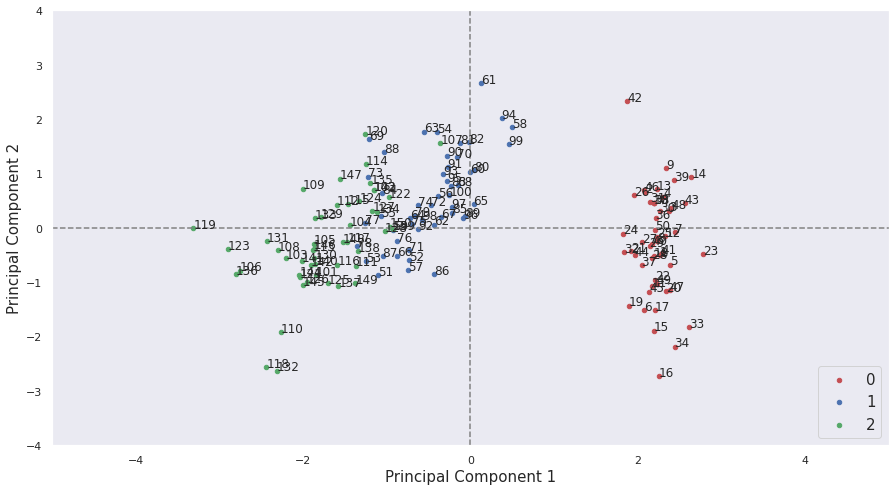

In [197]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    species_unique = list(set(Species))
    species_colors = ["r","b","g"]
    
    for i, spec in enumerate(Species):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20, c=species_colors[species_unique.index(spec)])
        ax.annotate(str(i+1), (pc1[i],pc2[i]))
    
    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    
    plt.grid()
    plt.axis([-5, 5, -4, 4])
    plt.show()
    
plot_scatter(pc1, pc2)